In [1]:
import torch
import torch.nn as nn

class MaskedLinear(nn.Linear):
    def __init__(self, in_features, out_features, bias=True):
        super(MaskedLinear, self).__init__(in_features, out_features, bias)
        self.register_buffer('weight_mask', torch.ones(out_features, in_features))

    def forward(self, input):
        masked_weight = self.weight * self.weight_mask
        return nn.functional.linear(input, masked_weight, self.bias)

# Create a simple model with a masked linear layer
model = nn.Sequential(
    MaskedLinear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 2)
)

# Set a specific weight mask for the masked linear layer
new_mask = torch.tensor([
    [1, 0, 1],
    [1, 1, 0],
    [0, 1, 1],
    [1, 1, 1]
])
model[0].weight_mask.copy_(new_mask)

tensor([[1., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.],
        [1., 1., 1.]])

In [7]:
model[0].weight_mask

tensor([[1., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.],
        [1., 1., 1.]])

In [16]:
import torch
import torch.nn as nn

class SimpleFeedforward(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleFeedforward, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

input_size = 3
hidden_size = 4
output_size = 2

model = SimpleFeedforward(input_size, hidden_size, output_size)
model_state_dict = model.state_dict()
print(model_state_dict)

OrderedDict([('hidden.weight', tensor([[-0.0608,  0.0539,  0.5331],
        [-0.4810,  0.1233,  0.0555],
        [-0.4860,  0.0546,  0.0107],
        [-0.2816,  0.4855, -0.0054]])), ('hidden.bias', tensor([ 0.1430,  0.2492, -0.4270,  0.0581])), ('output.weight', tensor([[ 0.3120, -0.1003,  0.1688,  0.1702],
        [-0.3985, -0.1890, -0.0265,  0.1303]])), ('output.bias', tensor([0.4874, 0.4113]))])


In [18]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0608,  0.0539,  0.5331],
         [-0.4810,  0.1233,  0.0555],
         [-0.4860,  0.0546,  0.0107],
         [-0.2816,  0.4855, -0.0054]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1430,  0.2492, -0.4270,  0.0581], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3120, -0.1003,  0.1688,  0.1702],
         [-0.3985, -0.1890, -0.0265,  0.1303]], requires_grad=True),
 Parameter containing:
 tensor([0.4874, 0.4113], requires_grad=True)]

In [19]:
import torch.optim as optim
optim.SGD(model.parameters(), lr=1e-10).zero_grad()

In [20]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0608,  0.0539,  0.5331],
         [-0.4810,  0.1233,  0.0555],
         [-0.4860,  0.0546,  0.0107],
         [-0.2816,  0.4855, -0.0054]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1430,  0.2492, -0.4270,  0.0581], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3120, -0.1003,  0.1688,  0.1702],
         [-0.3985, -0.1890, -0.0265,  0.1303]], requires_grad=True),
 Parameter containing:
 tensor([0.4874, 0.4113], requires_grad=True)]

In [21]:
import torch
from torch.utils.data import Dataset, DataLoader

class RandomTensorDataset(Dataset):
    def __init__(self, num_samples=100, input_size=10):
        self.num_samples = num_samples
        self.input_size = input_size
        self.data = torch.randn(num_samples, input_size)
        self.targets = torch.randint(0, 2, (num_samples,))

    def __len__(self):
        return self.num_samples

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

# Create a custom dataset with 100 samples, each with 10 features
random_dataset = RandomTensorDataset(num_samples=100, input_size=10)

# Create a DataLoader with a batch size of 20
dummy_loader = DataLoader(random_dataset, batch_size=20, shuffle=True)

# Loop through the DataLoader
for batch_idx, (in_tensor, target) in enumerate(dummy_loader):
    print(f"Batch {batch_idx}:")
    print(f"Input tensor (in_tensor) shape: {in_tensor.shape}")
    print(f"Target tensor shape: {target.shape}")
    print()


Batch 0:
Input tensor (in_tensor) shape: torch.Size([20, 10])
Target tensor shape: torch.Size([20])

Batch 1:
Input tensor (in_tensor) shape: torch.Size([20, 10])
Target tensor shape: torch.Size([20])

Batch 2:
Input tensor (in_tensor) shape: torch.Size([20, 10])
Target tensor shape: torch.Size([20])

Batch 3:
Input tensor (in_tensor) shape: torch.Size([20, 10])
Target tensor shape: torch.Size([20])

Batch 4:
Input tensor (in_tensor) shape: torch.Size([20, 10])
Target tensor shape: torch.Size([20])



In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

def flatten_tensor_list(tensor_list):
    return torch.cat([t.view(-1) for t in tensor_list])


In [87]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create a simple model
model = SimpleModel()

# Create random input and target tensors
in_tensor = torch.randn(1, 10)
target = torch.tensor([1])


In [88]:
criterion = nn.CrossEntropyLoss()


In [89]:
output = model(in_tensor)
loss = criterion(output, target)


In [84]:
def compute_sample_fisher(loss, return_outer_product=True):
    # The original function used self, but in our example,
    # we removed self and replaced with the model and criterion we created earlier
    _weight_only = False
    _modules = [model.fc1, model.fc2]

    ys = loss
    params = []
    m_idx = 0
    for module in _modules:
        m_idx += 1
        for name, param in module.named_parameters():
            if _weight_only and 'bias' in name:
                continue
            else:
                params.append(param)

    grads = torch.autograd.grad(ys, params)
    grads = flatten_tensor_list(grads)
    params = flatten_tensor_list(params)

    gTw = params.T @ grads

    if not return_outer_product:
        return grads, None, gTw, params
    else:
        return torch.ger(grads, grads), grads, gTw, params

result = compute_sample_fisher(loss,return_outer_product=False)

In [86]:
result[0]

tensor([ 0.0898, -0.1266,  0.0653,  0.0692, -0.2971, -0.1322,  0.0081, -0.2103,
        -0.2309, -0.2419,  0.0643, -0.0907,  0.0468,  0.0496, -0.2127, -0.0947,
         0.0058, -0.1506, -0.1653, -0.1733,  0.0148, -0.0208,  0.0107,  0.0114,
        -0.0488, -0.0217,  0.0013, -0.0346, -0.0379, -0.0398, -0.0074,  0.0105,
        -0.0054, -0.0057,  0.0246,  0.0110, -0.0007,  0.0174,  0.0191,  0.0201,
        -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000, -0.0000,  0.0000,
         0.0000,  0.0000, -0.2876, -0.2060, -0.0473,  0.0239,  0.0000,  0.3242,
         0.0914,  0.0735,  0.2146,  0.0000, -0.3242, -0.0914, -0.0735, -0.2146,
        -0.0000,  0.4008, -0.4008])

In [70]:
import numpy as np
np.random.choice(10,10)

array([6, 9, 9, 2, 2, 8, 9, 5, 8, 2])

In [97]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, SubsetRandomSampler

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

def flatten_tensor_list(tensors):
    return torch.cat([t.view(-1) for t in tensors])

# Create a small dataset with 4 samples
in_tensor = torch.randn(4, 10)
target = torch.tensor([1, 0, 1, 0])
dataset = TensorDataset(in_tensor, target)

def compute_sample_fisher(loss, return_outer_product=True):
    _weight_only = False
    _modules = [model.fc1, model.fc2]

    ys = loss
    params = []
    m_idx = 0
    for module in _modules:
        m_idx += 1
        for name, param in module.named_parameters():
            if _weight_only and 'bias' in name:
                continue
            else:
                params.append(param)

    grads = torch.autograd.grad(ys, params)
    grads = flatten_tensor_list(grads)
    params = flatten_tensor_list(params)

    gTw = params.T @ grads

    if not return_outer_product:
        return grads, None, gTw, params
    else:
        return torch.ger(grads, grads), grads, gTw, params

def _compute_wgH(model, dummy_loader, device, args, _fisher_mini_bsz):
    model = model.to(device)

    goal = args.fisher_subsample_size

    assert len(subset_indices) == goal * args.fisher_mini_bsz

    Gs = []

    if args.disable_log_soft:
        criterion = torch.nn.functional.cross_entropy
    else:
        criterion = nn.functional.nll_loss

    num_batches = 0
    num_samples = 0

    for in_tensor, target in dummy_loader:
        in_tensor, target = in_tensor.to(device), target.to(device)
        output = model(in_tensor)
        loss = criterion(output, target)

        g, _, _, _ = compute_sample_fisher(loss, return_outer_product=False)
        Gs.append(g[None, :].detach().cpu())

        num_batches += 1
        num_samples += _fisher_mini_bsz
        if num_samples == goal * args.fisher_mini_bsz:
            break

    grads = torch.cat(Gs, 0)
    return grads

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleModel()

subset_indices = list(range(len(dataset)))
args = lambda: None
args.fisher_subsample_size = 2
args.fisher_mini_bsz = len(dataset) // args.fisher_subsample_size
args.disable_log_soft = True

dummy_loader = DataLoader(dataset, batch_size=args.fisher_mini_bsz, sampler=SubsetRandomSampler(subset_indices))

grads = _compute_wgH(model, dummy_loader, device, args, args.fisher_mini_bsz)
print("Gradients tensor:\n", grads)


Gradients tensor:
 tensor([[ 0.0021, -0.0111,  0.0155, -0.0009,  0.0021, -0.0066, -0.0117, -0.0051,
          0.0031, -0.0150, -0.0392,  0.2069, -0.2899,  0.0173, -0.0387,  0.1233,
          0.2182,  0.0956, -0.0586,  0.2817,  0.0225, -0.1186,  0.1662, -0.0099,
          0.0222, -0.0707, -0.1251, -0.0548,  0.0336, -0.1616,  0.0164, -0.0865,
          0.1212, -0.0072,  0.0162, -0.0516, -0.0912, -0.0400,  0.0245, -0.1178,
         -0.0059,  0.0310, -0.0435,  0.0026, -0.0058,  0.0185,  0.0327,  0.0143,
         -0.0088,  0.0422,  0.0014, -0.0255,  0.0146,  0.0107, -0.0038, -0.0780,
         -0.1699, -0.2387,  0.1845, -0.0218,  0.0780,  0.1699,  0.2387, -0.1845,
          0.0218,  0.0477, -0.0477],
        [-0.0062,  0.0086,  0.0154,  0.0089, -0.0101, -0.0107,  0.0055,  0.0103,
          0.0081, -0.0062,  0.1167, -0.1603, -0.2877, -0.1673,  0.1889,  0.2007,
         -0.1033, -0.1936, -0.1521,  0.1161, -0.0669,  0.0919,  0.1650,  0.0960,
         -0.1083, -0.1151,  0.0593,  0.1110,  0.0872,

In [101]:
(grads.T @ grads).shape

torch.Size([67, 67])

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import ot

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for distribution u (2D)
num_points = 10
mean_u = [0, 0]
cov_u = [[1, 0], [0, 1]]
u = np.random.multivariate_normal(mean_u, cov_u, num_points)

# Generate data for distribution v (1D) using data points from u with the second dimension missing
v = u[:, 0].copy()

# Embed v back into the 2D space by adding a new dimension with zeros
v_embedded = np.zeros((num_points, 2))
v_embedded[:, 0] = v

# Assign custom mass values for points in u and v
# a = np.array([0.05, 0.2, 0.1, 0.05, 0.1, 0.15, 0.1, 0.1, 0.05, 0.1])
# b = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
a = [1/num_points for i in range(num_points)]
b = [1/num_points for i in range(num_points)]

# Check if the total mass of u and v is the same
assert np.isclose(np.sum(a), np.sum(b)), "The total mass of u and v should be the same"

# Compute the cost matrix (squared Euclidean distance) between u and v_embedded
M = ot.dist(u, v_embedded, metric='sqeuclidean')

# Compute the optimal transport plan using the Sinkhorn algorithm
reg = 0.01  # regularization parameter
P = ot.sinkhorn(a, b, M, reg)


c:\Users\leiyo\Anaconda3\lib\site-packages\ot\bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


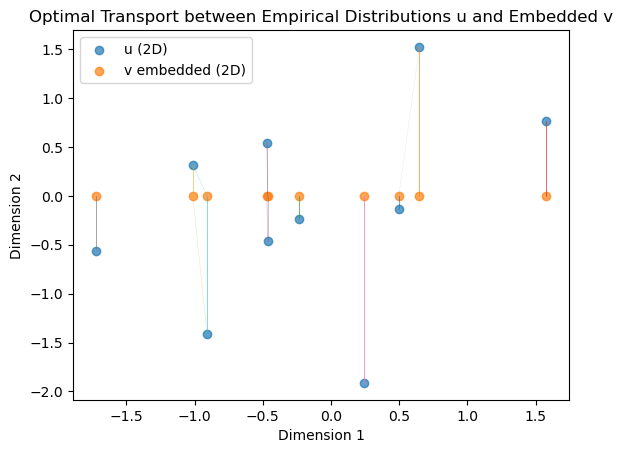

In [131]:
# Visualize the distributions and the transportation plan
plt.scatter(u[:, 0], u[:, 1], label='u (2D)', alpha=0.7)
plt.scatter(v_embedded[:, 0], v_embedded[:, 1], label='v embedded (2D)', alpha=0.7)

for i in range(num_points):
    for j in range(num_points):
        plt.plot([u[i, 0], v_embedded[j, 0]], [u[i, 1], v_embedded[j, 1]],
                 alpha=P[i, j] * num_points, linewidth=0.5)

plt.legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Optimal Transport between Empirical Distributions u and Embedded v')
plt.show()

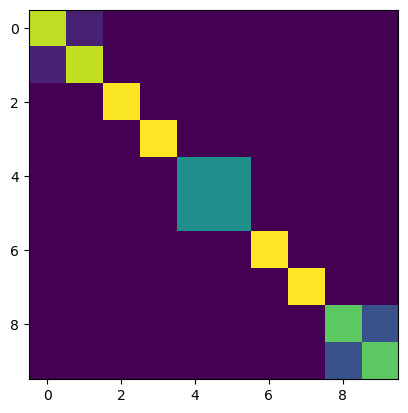

In [132]:
plt.imshow(P)

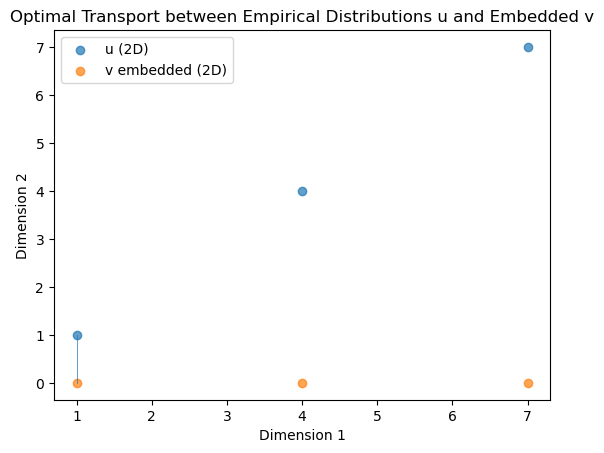

In [55]:
# Visualize the distributions and the transportation plan
plt.scatter(u[:, 0], u[:, 1], label='u (2D)', alpha=0.7)
plt.scatter(v_embedded[:, 0], v_embedded[:, 1], label='v embedded (2D)', alpha=0.7)

for i in range(num_points):
    for j in range(num_points):
        plt.plot([u[i, 0], v_embedded[j, 0]], [u[i, 1], v_embedded[j, 1]],
                 alpha=P[i, j] / np.max(P), linewidth=0.5)

plt.legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Optimal Transport between Empirical Distributions u and Embedded v')
plt.show()

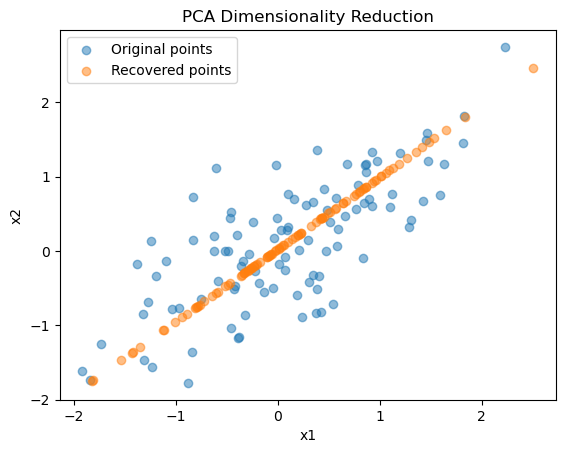

U matrix:
[[0.71749523 0.69656342]]


In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for distribution X (2D)
num_samples = 100
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
X = np.random.multivariate_normal(mean, cov, num_samples)

# Apply PCA to reduce dimensionality from 2D to 1D
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)

# Recover the 2D points from the 1D projection
X_recovered = pca.inverse_transform(X_reduced)

# Plot the original 2D points and the recovered 2D points after dimensionality reduction
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original points')
plt.scatter(X_recovered[:, 0], X_recovered[:, 1], alpha=0.5, label='Recovered points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('PCA Dimensionality Reduction')
plt.show()

U = pca.components_
print("U matrix:")
print(U)


In [127]:
import numpy as np

# Set the number of elements in the vector
n = 4



# Create a column vector of ones with n elements
ones_n = np.ones((n, 1))

# Calculate the matrix product 1n * 1n^T
ones_n_outer_product = ones_n @ ones_n.T

# Multiply the matrix product by 1/n
scaled_matrix = (1 / n) * ones_n_outer_product

scaled_matrix

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

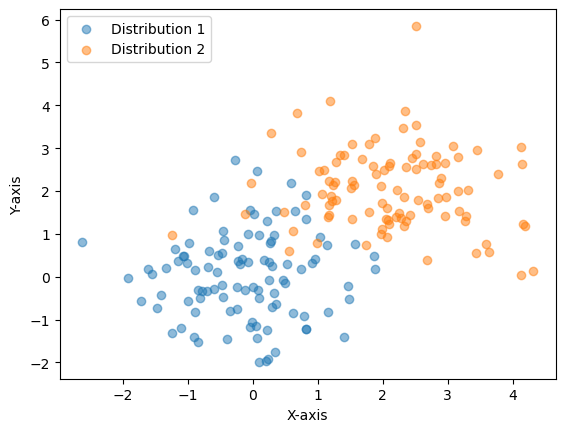

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Parameters
n_samples = 100
mean1 = np.array([0, 0])
mean2 = np.array([2, 2])
cov = np.eye(2)

# Generate samples
X1 = np.random.multivariate_normal(mean1, cov, size=n_samples)
X2 = np.random.multivariate_normal(mean2, cov, size=n_samples)

# Plot the samples
plt.scatter(X1[:, 0], X1[:, 1], label="Distribution 1", alpha=0.5)
plt.scatter(X2[:, 0], X2[:, 1], label="Distribution 2", alpha=0.5)
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


In [15]:
# Define Gaussian (RBF) kernel
def gaussian_kernel(x, y, sigma=1):
    return np.exp(-np.linalg.norm(x - y)**2 / (2 * sigma**2))

# Compute kernel mean embedding
def kernel_mean_embedding(X, kernel_func, *kernel_args):
    n = X.shape[0]
    KME = np.zeros_like(X)
    for i in range(n):
        for j in range(n):
            KME[i] += kernel_func(X[i], X[j], *kernel_args)
        KME[i] /= n
    return KME

KME_X1 = kernel_mean_embedding(X1, gaussian_kernel, 1)
KME_X2 = kernel_mean_embedding(X2, gaussian_kernel, 1)


# Compute the difference between the Kernel Mean Embeddings
KME_diff = np.mean(KME_X1 - KME_X2)
print(f"KME difference: {KME_diff}")


KME difference: 0.001588571230996123


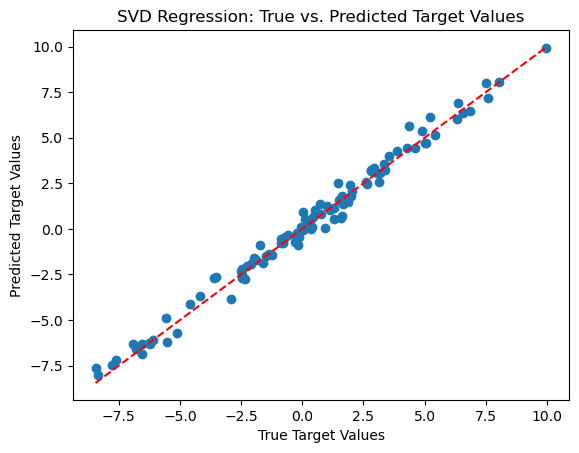

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
n_samples = 100
n_features = 5

X = np.random.randn(n_samples, n_features)
true_weights = np.array([2, -1, 0.5, 3, -1.5])
y = X @ true_weights + 0.5 * np.random.randn(n_samples)

# Perform SVD on the input matrix X
U, S, Vt = np.linalg.svd(X, full_matrices=False)
S_inv = np.diag(1 / S)
weights_svd = Vt.T @ S_inv @ U.T @ y

# Make predictions on the training data
y_pred = X @ weights_svd

# Plot the true target values against the predicted target values
plt.scatter(y, y_pred)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('SVD Regression: True vs. Predicted Target Values')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Plot the ideal line
plt.show()


array([[11.1957369 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 10.15068207,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  9.97457783,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  9.2994827 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  8.13240655]])